In [1]:
# ========================================================== #
# File name: retrain_cifar-10_bn.py
# Author: BIGBALLON
# Date created: 07/
27/2017
# Python Version: 3.5.2
# Tensorflow Vetsion: 1.2.1
# Result: test accuracy about 93.50 ~ 93.70%
# ========================================================== #

import keras
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.initializers import he_normal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file

num_classes  = 10
batch_size   = 128
epochs       = 200
iterations   = 391
dropout      = 0.5
weight_decay = 0.0001
log_filepath = r'./vgg19_retrain_logs/'

from keras import backend as K
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)

def scheduler(epoch):
    if epoch < 80:
        return 0.1
    if epoch < 160:
        return 0.01
    return 0.001

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
filepath = get_file('vgg19_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH, cache_subdir='models')

# data loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# data preprocessing 
x_train[:,:,:,0] = (x_train[:,:,:,0]-123.680)
x_train[:,:,:,1] = (x_train[:,:,:,1]-116.779)
x_train[:,:,:,2] = (x_train[:,:,:,2]-103.939)
x_test[:,:,:,0] = (x_test[:,:,:,0]-123.680)
x_test[:,:,:,1] = (x_test[:,:,:,1]-116.779)
x_test[:,:,:,2] = (x_test[:,:,:,2]-103.939)

# build model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv1', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# model modification for cifar-10
model.add(Flatten(name='flatten'))
model.add(Dense(4096, use_bias = True, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc_cifa10'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(4096, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc2'))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))      
model.add(Dense(10, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='predictions_cifa10'))        
model.add(BatchNormalization())
model.add(Activation('softmax'))

# load pretrained weight from VGG19 by name      
model.load_weights(filepath, by_name=True)

# -------- optimizer setting -------- #
sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

print('Using real-time data augmentation.')
datagen = ImageDataGenerator(horizontal_flip=True,
        width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=iterations,
                    epochs=epochs,
                    callbacks=cbks,
                    validation_data=(x_test, y_test))
model.save('retrain.h5')

Using TensorFlow backend.
c:\users\an\anaconda3\envs\cuda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\an\anaconda3\envs\cuda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\an\anaconda3\envs\cuda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\an\anaconda3\envs\cuda\lib\site-packages\tensorflo

Using real-time data augmentation.
Epoch 1/200
391/391 [==============================] - 92s 236ms/step - loss: 2.0550 - acc: 0.6580 - val_loss: 2.2768 - val_acc: 0.6271
Epoch 2/200
391/391 [==============================] - 72s 184ms/step - loss: 1.6651 - acc: 0.7625 - val_loss: 1.9903 - val_acc: 0.6632
Epoch 3/200
391/391 [==============================] - 75s 191ms/step - loss: 1.4769 - acc: 0.7941 - val_loss: 1.9826 - val_acc: 0.6573
Epoch 4/200
391/391 [==============================] - 73s 187ms/step - loss: 1.3313 - acc: 0.8152 - val_loss: 1.4932 - val_acc: 0.7619
Epoch 5/200
391/391 [==============================] - 71s 181ms/step - loss: 1.2169 - acc: 0.8305 - val_loss: 1.6827 - val_acc: 0.7001
Epoch 6/200
391/391 [==============================] - 68s 175ms/step - loss: 1.1213 - acc: 0.8442 - val_loss: 1.3368 - val_acc: 0.7712
Epoch 7/200
391/391 [==============================] - 66s 168ms/step - loss: 1.0495 - acc: 0.8512 - val_loss: 1.2088 - val_acc: 0.8040
Epoch 8/200
3

Prediction :  3


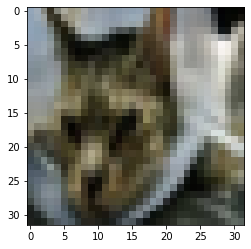

In [3]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.datasets import cifar10
from keras.models import load_model

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
model = load_model('retrain.h5')

# Get one and predict
r = random.randint(0, 10000 - 1)
input_val = x_test[r:r+1]
output_val = model.predict(input_val)

print("Prediction : ", np.argmax(output_val))

# Selected sample showing
plt.imshow(
    input_val.reshape(32, 32,3),
    interpolation='nearest')
plt.show()

In [8]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
from keras.models import load_model

"""
0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck
"""
import PIL
from PIL import Image
from PIL import *
import os
from array import *
from scipy.misc import *

def rescale_image(image_file):
    print(image_file)
    im = imresize(imread(image_file, 0, 'RGB'), (32, 32, 3))
    return im

def load_and_scale_imgs(img_files):
    imgs = [rescale_image(img_file) for img_file in img_files]
    return np.array(imgs)



model = load_model("myvgg.h5")   # This the last model we saved
imgs = load_and_scale_imgs(['./airplane.png', './cat.jpg', './horse.png'])
predictions = model.predict(imgs/255)

print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))
print(np.argmax(predictions[2]))

./airplane.png
./cat.jpg
./horse.png


c:\users\an\anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
c:\users\an\anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


4
4
4


In [3]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('cat.png')
	# load model
	model = load_model('myvgg.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])
 
# entry point, run the example
run_example()


AttributeError: 'Model' object has no attribute 'predict_classes'

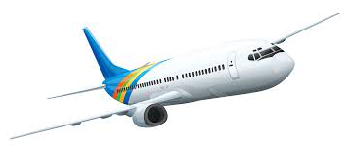

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 10)

In [2]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
# import necessary modules
import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(2017) 
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import cv2

# display the image
img_disp = cv2.imread('airplane.png')
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
plt.imshow(img_disp)
plt.axis("off")  
plt.show()
# pre-process the image
img = image.load_img('airplane.png', target_size=(32,32))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
model = load_model('myvgg.h5')
# predict the output 
preds = model.predict(img)
# decode the prediction
pred_class = decode_predictions(preds, top=3)[0][0]
print("Predicted Class: %s"%pred_class[1])
print("Confidance: %s"%pred_class[2])